In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import QuantileTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import r2_score
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from scipy.stats import boxcox
pd.options.display.max_rows = 50
pd.options.display.max_columns = 999
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import Lasso
##pd.set_option('display.max_rows', 2938)

# Import and concatenate files

In [2]:
def load_original_data(a):
    df = pd.read_csv(a)
    return df

def lower_case_column_names(df):
    df.columns=[i.lower() for i in df.columns]
    return df

def no_column_space(df):
    df.columns = df.columns.str.replace(' ', '_')
    return df

##def drop_columns(df) :
##    df.drop(columns=['##', '##', '##'], inplace=True)
##    return df

In [3]:
df=load_original_data('data/Life Expectancy Data.csv') 

df = lower_case_column_names(df)

df = no_column_space(df)

##df = drop_columns(df)##

In [4]:
df['infant_deaths']



0       62
1       64
2       66
3       69
4       71
        ..
2933    27
2934    26
2935    25
2936    25
2937    24
Name: infant_deaths, Length: 2938, dtype: int64

In [5]:
df.loc[df['infant_deaths'] == 0]


,country,year,status,life_expectancy_,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles_,_bmi_,under-five_deaths_,polio,total_expenditure,diphtheria_,_hiv/aids,gdp,population,_thinness__1-19_years,_thinness_5-9_years,income_composition_of_resources,schooling
16,Albania,2015,Developing,77.8,74.0,0,4.60,364.975229,99.0,0,58.0,0,99.0,6.00,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2
17,Albania,2014,Developing,77.5,8.0,0,4.51,428.749067,98.0,0,57.2,1,98.0,5.88,98.0,0.1,4575.763787,288914.0,1.2,1.3,0.761,14.2
18,Albania,2013,Developing,77.2,84.0,0,4.76,430.876979,99.0,0,56.5,1,99.0,5.66,99.0,0.1,4414.723140,289592.0,1.3,1.4,0.759,14.2
19,Albania,2012,Developing,76.9,86.0,0,5.14,412.443356,99.0,9,55.8,1,99.0,5.59,99.0,0.1,4247.614380,2941.0,1.3,1.4,0.752,14.2
20,Albania,2011,Developing,76.6,88.0,0,5.37,437.062100,99.0,28,55.1,1,99.0,5.71,99.0,0.1,4437.178680,295195.0,1.4,1.5,0.738,13.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2853,Vanuatu,2004,Developing,69.6,169.0,0,0.85,334.167337,63.0,0,44.1,0,67.0,4.12,69.0,0.1,1787.947230,24143.0,1.6,1.5,0.000,10.7
2854,Vanuatu,2003,Developing,69.4,173.0,0,1.20,27.298391,64.0,165,43.3,0,67.0,4.20,69.0,0.1,158.527240,198964.0,1.6,1.6,0.000,10.4
2855,Vanuatu,2002,Developing,69.3,176.0,0,1.24,171.137361,66.0,101,42.6,0,67.0,3.52,7.0,0.1,1353.934819,193956.0,1.7,1.6,0.000,10.2
2856,Vanuatu,2001,Developing,69.1,179.0,0,0.91,163.105292,68.0,7,41.9,0,67.0,3.37,7.0,0.1,1362.617310,18929.0,1.7,1.6,0.000,10.1


In [6]:
df.columns = (['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under_five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv_aids', 'gdp', 'population',
       '_thinness_1_19_years', 'thinness_5-9_years',
       'income_composition_of_resources', 'schooling'])

In [7]:
df.percentage_expenditure.describe()

count     2938.000000
mean       738.251295
std       1987.914858
min          0.000000
25%          4.685343
50%         64.912906
75%        441.534144
max      19479.911610
Name: percentage_expenditure, dtype: float64

<AxesSubplot:>

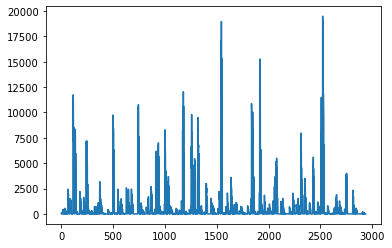

In [8]:
df.percentage_expenditure.plot()

# Add/drop columns and rows

In [9]:
## Add GDP per capita

##df['gdp_capita'] = df['gdp'] / df['population']



In [10]:
##df.drop(['adult_mortality', 'percentage_expenditure', 'year', 'under_five_deaths', 'infant_deaths'], axis=1, inplace = True)


In [11]:
df

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under_five_deaths,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,_thinness_1_19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [12]:
## Drop 0 value

df = df.replace(0, np.NaN)
df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 911 entries, 0 to 2932
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          911 non-null    object 
 1   year                             911 non-null    int64  
 2   status                           911 non-null    object 
 3   life_expectancy                  911 non-null    float64
 4   adult_mortality                  911 non-null    float64
 5   infant_deaths                    911 non-null    float64
 6   alcohol                          911 non-null    float64
 7   percentage_expenditure           911 non-null    float64
 8   hepatitis_b                      911 non-null    float64
 9   measles                          911 non-null    float64
 10  bmi                              911 non-null    float64
 11  under_five_deaths                911 non-null    float64
 12  polio                

In [14]:
## Missed countries
def clean_missedcountry(a):
    missed_country = a[a.groupby('country')['country'].transform('size') < 10]
    missed_list = missed_country.index.tolist()
    a.drop(missed_list, inplace = True)
    return a

In [15]:
clean_missedcountry(df)

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under_five_deaths,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,_thinness_1_19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62.0,0.01,71.279624,65.0,1154.0,19.1,83.0,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,18.6,86.0,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66.0,0.01,73.219243,64.0,430.0,18.1,89.0,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69.0,0.01,78.184215,67.0,2787.0,17.6,93.0,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71.0,0.01,7.097109,68.0,3013.0,17.2,97.0,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2912,Zambia,2009,Developing,57.4,368.0,30.0,2.30,143.869887,94.0,26.0,2.2,47.0,93.0,4.73,94.0,9.1,1139.112330,13456417.0,6.7,6.6,0.518,11.6
2913,Zambia,2008,Developing,55.7,45.0,31.0,2.12,153.678375,87.0,140.0,19.7,49.0,9.0,4.87,87.0,11.9,1369.682490,1382517.0,6.8,6.7,0.504,11.4
2914,Zambia,2007,Developing,52.6,487.0,32.0,2.08,10.851482,8.0,535.0,19.2,51.0,77.0,4.37,8.0,13.6,114.587985,12725974.0,6.9,6.8,0.492,11.1
2915,Zambia,2006,Developing,58.0,526.0,33.0,2.25,1.860004,81.0,459.0,18.8,52.0,83.0,6.11,81.0,15.9,13.154199,12383446.0,7.0,6.9,0.479,10.9


In [16]:
def remove_outliers(df):
    df_n = df._get_numeric_data()
    df_c = df.select_dtypes(include=['object'])
    Q1 = df_n.quantile(0.25)
    Q3 = df_n.quantile(0.75)
    IQR = Q3 - Q1
    df_n = df_n[~((df_n < (Q1 - 1.5 * IQR)) |(df_n > (Q3 + 1.5 * IQR))).any(axis=1)]
    df = df_n.merge(df_c,how='left',left_index=True,right_index=True)
    return df
remove_outliers(df)

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under_five_deaths,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,_thinness_1_19_years,thinness_5-9_years,income_composition_of_resources,schooling,country,status
97,2014,74.6,12.0,1.0,3.91,295.608714,93.0,13.0,54.1,1.0,95.0,4.48,93.0,0.1,3994.712355,29622.0,2.1,2.1,0.739,12.7,Armenia,Developing
98,2013,74.4,123.0,1.0,3.79,279.429081,95.0,10.0,53.3,1.0,96.0,4.55,95.0,0.1,3843.591213,289359.0,2.1,2.1,0.736,12.7,Armenia,Developing
101,2010,73.5,132.0,1.0,4.23,224.321201,94.0,2.0,51.2,1.0,96.0,4.56,94.0,0.1,3218.381655,2877311.0,2.0,2.1,0.720,12.3,Armenia,Developing
105,2006,72.9,141.0,1.0,4.01,244.535277,78.0,137.0,49.2,1.0,87.0,4.58,87.0,0.1,2158.299000,29585.0,2.0,2.1,0.692,11.2,Armenia,Developing
107,2004,73.0,132.0,1.0,3.81,97.740877,91.0,1783.0,48.4,1.0,93.0,5.50,91.0,0.1,1191.961920,3612.0,2.0,2.1,0.668,10.9,Armenia,Developing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2835,2006,67.6,185.0,23.0,1.96,77.270921,98.0,823.0,38.1,27.0,94.0,5.49,96.0,0.4,654.283837,2648825.0,3.2,3.2,0.626,11.8,Uzbekistan,Developing
2836,2005,67.3,192.0,24.0,1.78,40.133421,99.0,737.0,37.5,28.0,99.0,5.11,99.0,0.3,546.776852,26167.0,3.2,3.2,0.620,11.7,Uzbekistan,Developing
2837,2004,67.8,183.0,24.0,1.59,34.418872,99.0,75.0,37.0,29.0,99.0,5.11,99.0,0.3,465.119887,2586435.0,3.2,3.2,0.613,11.6,Uzbekistan,Developing
2838,2003,67.2,183.0,25.0,1.54,28.521358,99.0,85.0,36.4,30.0,99.0,5.17,98.0,0.3,396.129969,2556765.0,3.3,3.3,0.607,11.3,Uzbekistan,Developing


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 634 entries, 0 to 2916
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          634 non-null    object 
 1   year                             634 non-null    int64  
 2   status                           634 non-null    object 
 3   life_expectancy                  634 non-null    float64
 4   adult_mortality                  634 non-null    float64
 5   infant_deaths                    634 non-null    float64
 6   alcohol                          634 non-null    float64
 7   percentage_expenditure           634 non-null    float64
 8   hepatitis_b                      634 non-null    float64
 9   measles                          634 non-null    float64
 10  bmi                              634 non-null    float64
 11  under_five_deaths                634 non-null    float64
 12  polio                

In [18]:
##drop duplicated rows
df.drop_duplicates()

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under_five_deaths,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,_thinness_1_19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62.0,0.01,71.279624,65.0,1154.0,19.1,83.0,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,18.6,86.0,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66.0,0.01,73.219243,64.0,430.0,18.1,89.0,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69.0,0.01,78.184215,67.0,2787.0,17.6,93.0,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71.0,0.01,7.097109,68.0,3013.0,17.2,97.0,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2912,Zambia,2009,Developing,57.4,368.0,30.0,2.30,143.869887,94.0,26.0,2.2,47.0,93.0,4.73,94.0,9.1,1139.112330,13456417.0,6.7,6.6,0.518,11.6
2913,Zambia,2008,Developing,55.7,45.0,31.0,2.12,153.678375,87.0,140.0,19.7,49.0,9.0,4.87,87.0,11.9,1369.682490,1382517.0,6.8,6.7,0.504,11.4
2914,Zambia,2007,Developing,52.6,487.0,32.0,2.08,10.851482,8.0,535.0,19.2,51.0,77.0,4.37,8.0,13.6,114.587985,12725974.0,6.9,6.8,0.492,11.1
2915,Zambia,2006,Developing,58.0,526.0,33.0,2.25,1.860004,81.0,459.0,18.8,52.0,83.0,6.11,81.0,15.9,13.154199,12383446.0,7.0,6.9,0.479,10.9


In [19]:


column_1 = df["life_expectancy"]
column_2 = df["income_composition_of_resources"]
correlation = column_1.corr(column_2)

# Plotting for first impression

In [20]:
corr_matrix = df.corr()

In [21]:
# Select upper triangle of correlation matrix
## upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.80
## to_drop = [column for column in upper.columns if any(upper[column] > 0.80)] 

# Drop features 
## df.drop(to_drop, axis=1, inplace=True)

In [22]:
df.columns

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under_five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv_aids', 'gdp', 'population', '_thinness_1_19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling'],
      dtype='object')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 634 entries, 0 to 2916
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          634 non-null    object 
 1   year                             634 non-null    int64  
 2   status                           634 non-null    object 
 3   life_expectancy                  634 non-null    float64
 4   adult_mortality                  634 non-null    float64
 5   infant_deaths                    634 non-null    float64
 6   alcohol                          634 non-null    float64
 7   percentage_expenditure           634 non-null    float64
 8   hepatitis_b                      634 non-null    float64
 9   measles                          634 non-null    float64
 10  bmi                              634 non-null    float64
 11  under_five_deaths                634 non-null    float64
 12  polio                

In [24]:
df.style.background_gradient(cmap='Blues')


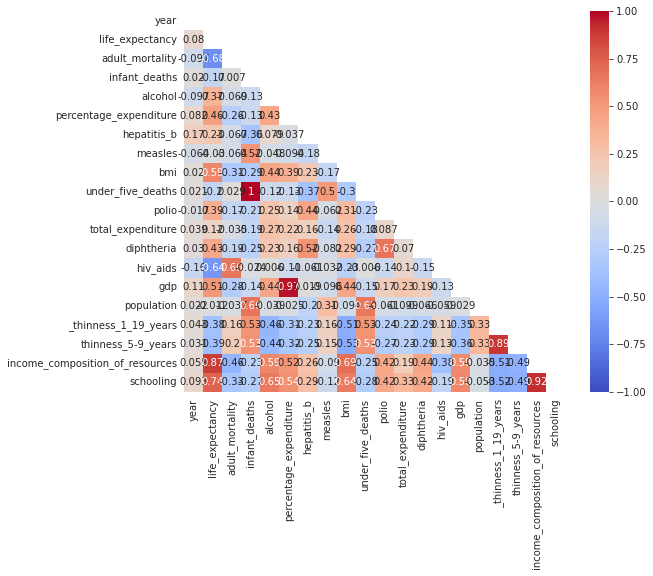

In [25]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

# Clean the NaN 


In [26]:
df.columns[df.isna().any()].tolist()

[]

## Clean the life_expectancy


In [27]:
##df.fillna(df.mean(), inplace=True)
##Testing for replacing all rows with NaN.

In [28]:
df_alcohol_clean = df[df['alcohol'].isnull()]
alcohol_list = df_alcohol_clean.index.tolist()
for a in alcohol_list:
    b = df.iloc[a]




## Should not drop life_expectancy because it is a independant variable. 
## And the number of NaN values at this columns is not significant.

## Clean adult_mortality. 
The adult mortality rate shown in the World Development Indicators (WDI) database and related products refers to 
the probability that those who have reached age 15 will die before reaching age 60 (shown per 1,000 persons). 
In other words, a value of 150 means that out of 1,000 persons who have reached age 15, 150 are expected to 
die before reaching age 60, and 850 are expected to survive to age 60. This is based on a “synthetic cohort”: 
current life-table mortality rates are applied to the current cohort of 15 year olds, assuming no changes in mortality.

In [29]:
##df[df['adult_mortality'].isnull()]
## Same case as life expectancy.

## Clean alcohol

In [30]:
df[df['alcohol'].isnull()]

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under_five_deaths,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,_thinness_1_19_years,thinness_5-9_years,income_composition_of_resources,schooling


# Get the numeric and categoric

In [31]:
numericals_features =df._get_numeric_data()
# numericals =data.select_dtypes(np.number)
numericals_features.head()

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under_five_deaths,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,_thinness_1_19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,2015,65.0,263.0,62.0,0.01,71.279624,65.0,1154.0,19.1,83.0,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,18.6,86.0,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,59.9,268.0,66.0,0.01,73.219243,64.0,430.0,18.1,89.0,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,59.5,272.0,69.0,0.01,78.184215,67.0,2787.0,17.6,93.0,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,59.2,275.0,71.0,0.01,7.097109,68.0,3013.0,17.2,97.0,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [32]:
numericals_features_scaled=StandardScaler().fit_transform(numericals_features)
numericals_features_scaled = pd.DataFrame(numericals_features_scaled, index= numericals_features.index, columns= numericals_features.columns)


In [33]:
## Get Categorical data

categoricals_features = df.select_dtypes(object)

# get dummies pandas
categoricals_features=pd.get_dummies(categoricals_features, drop_first=True)
##pd.DataFrame(OneHotEncoder(drop='first').fit_transform(categoricals_features).toarray(),
## columns=OneHotEncoder(drop='first').fit(categoricals_features).get_feature_names(input_features=categoricals_features.columns)).head()

In [34]:
numericals_features_scaled

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under_five_deaths,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,_thinness_1_19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,1.824748,-0.339855,0.633124,-0.052432,-1.061057,-0.353496,-0.518946,-0.259891,-0.791302,-0.054930,-3.361934,1.073513,-0.926417,-0.406112,-0.443770,0.035516,1.949637,1.926487,-1.035376,-0.641404
1,1.578128,-0.888640,0.692747,-0.041726,-1.061057,-0.352251,-0.636956,-0.303010,-0.816514,-0.042998,-1.093350,1.082109,-1.071262,-0.406112,-0.441174,-0.267060,2.002810,1.961779,-1.054691,-0.675334
2,1.331509,-0.888640,0.670388,-0.031020,-1.061057,-0.352420,-0.558283,-0.307049,-0.841727,-0.031066,-0.918843,1.060618,-0.974699,-0.406112,-0.439435,0.017359,2.038259,1.997070,-1.093322,-0.709264
3,1.084890,-0.931682,0.700199,-0.014961,-1.061057,-0.349665,-0.440273,-0.153524,-0.866940,-0.015156,-0.700710,1.228246,-0.829853,-0.406112,-0.435947,-0.236544,2.073708,2.050008,-1.138391,-0.743193
4,0.838271,-0.963964,0.722558,-0.004255,-1.061057,-0.389109,-0.400936,-0.138803,-0.887110,0.000753,-0.657083,0.948867,-0.781571,-0.406112,-0.491305,-0.243050,2.126882,2.085300,-1.196337,-0.844983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2912,0.345033,-1.157652,1.415669,-0.223728,-0.498276,-0.313218,0.621817,-0.333364,-1.643488,-0.198113,0.433583,-0.400751,0.473756,1.176943,-0.393119,-0.148155,0.088566,0.038381,-0.784275,-0.132455
2913,0.098414,-1.340581,-0.991588,-0.218375,-0.542512,-0.307775,0.346461,-0.325938,-0.761047,-0.190158,-3.231055,-0.340577,0.135783,1.669449,-0.372071,-0.257505,0.106291,0.056027,-0.874414,-0.200315
2914,-0.148205,-1.674156,2.302553,-0.213022,-0.552342,-0.387026,-2.761136,-0.300210,-0.786259,-0.182204,-0.264443,-0.555485,-3.678480,1.968470,-0.486645,-0.154771,0.124015,0.073673,-0.951675,-0.302105
2915,-0.394824,-1.093089,2.593212,-0.207669,-0.510564,-0.392015,0.110440,-0.305160,-0.806429,-0.178226,-0.002684,0.192393,-0.153908,2.373028,-0.495905,-0.157873,0.141740,0.091319,-1.035376,-0.369964


In [35]:
categoricals_features

,country_Armenia,country_Australia,country_Bangladesh,country_Benin,country_Botswana,country_Brazil,country_Bulgaria,country_Cameroon,country_Canada,country_China,country_France,country_Georgia,country_Germany,country_Ghana,country_India,country_Indonesia,country_Iraq,country_Israel,country_Italy,country_Jordan,country_Kazakhstan,country_Kenya,country_Malawi,country_Malaysia,country_Mali,country_Mauritania,country_Morocco,country_Mozambique,country_Myanmar,country_Nepal,country_Nigeria,country_Pakistan,country_Philippines,country_Poland,country_Romania,country_Russian Federation,country_Rwanda,country_Senegal,country_Serbia,country_South Africa,country_Spain,country_Sri Lanka,country_Thailand,country_Tunisia,country_Turkey,country_Uganda,country_Ukraine,country_Uzbekistan,country_Zambia,status_Developing
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2912,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2913,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2914,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2915,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1


In [36]:
all_features=pd.concat([numericals_features_scaled, categoricals_features], axis=1) # concat numerical and categorical transformations
all_features = all_features.reset_index()
type(all_features)

pandas.core.frame.DataFrame

In [37]:
data_train, data_val = train_test_split(all_features, test_size = 0.2, random_state = 2)


In [38]:
#Classifying Independent and Dependent Features
#_______________________________________________
#Dependent Variable
Y_train = data_train.life_expectancy.values
#Independent Variables
X_train = data_train.drop(['life_expectancy'], axis=1).values
#Independent Variables for Test Set
X_test = data_val.drop(['life_expectancy'], axis=1).values


In [39]:
def score(y_pred, y_true):
    error = np.square(np.log10(y_pred +1) - np.log10(y_true +1)).mean() ** 0.5
    score = 1 - error
    return score
actual_life_expectancy = list(data_val['life_expectancy'])
actual_life_expectancy = np.asarray('life_expectancy')
actual_life_expectancy

array('life_expectancy', dtype='<U15')

In [43]:
#Lasso Regression

from sklearn.linear_model import Lasso
#Initializing the Lasso Regressor with Normalization Factor as True
lasso_reg = Lasso(normalize=True)


In [45]:
#Fitting the Training data to the Lasso regressor
lasso_reg.fit(X_train,Y_train)
#Predicting for X_test
y_pred_lass =lasso_reg.predict(X_test)
y_pred_lass


array([-0.01043966, -0.01043966, -0.01043966, -0.01043966, -0.01043966,
       -0.01043966, -0.01043966, -0.01043966, -0.01043966, -0.01043966,
       -0.01043966, -0.01043966, -0.01043966, -0.01043966, -0.01043966,
       -0.01043966, -0.01043966, -0.01043966, -0.01043966, -0.01043966,
       -0.01043966, -0.01043966, -0.01043966, -0.01043966, -0.01043966,
       -0.01043966, -0.01043966, -0.01043966, -0.01043966, -0.01043966,
       -0.01043966, -0.01043966, -0.01043966, -0.01043966, -0.01043966,
       -0.01043966, -0.01043966, -0.01043966, -0.01043966, -0.01043966,
       -0.01043966, -0.01043966, -0.01043966, -0.01043966, -0.01043966,
       -0.01043966, -0.01043966, -0.01043966, -0.01043966, -0.01043966,
       -0.01043966, -0.01043966, -0.01043966, -0.01043966, -0.01043966,
       -0.01043966, -0.01043966, -0.01043966, -0.01043966, -0.01043966,
       -0.01043966, -0.01043966, -0.01043966, -0.01043966, -0.01043966,
       -0.01043966, -0.01043966, -0.01043966, -0.01043966, -0.01

In [46]:
#Printing the Score with RMLSE
print("\n\nLasso SCORE : ", score(y_pred_lass, actual_life_expectancy))

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U15'), dtype('int64')) -> None

In [44]:
x=numericals_features_scaled.drop(['life_expectancy'], axis=1)
y=numericals_features_scaled.life_expectancy

In [45]:
x

,year,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under_five_deaths,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,_thinness_1_19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,1.824748,0.633124,-0.052432,-1.061057,-0.353496,-0.518946,-0.259891,-0.791302,-0.054930,-3.361934,1.073513,-0.926417,-0.406112,-0.443770,0.035516,1.949637,1.926487,-1.035376,-0.641404
1,1.578128,0.692747,-0.041726,-1.061057,-0.352251,-0.636956,-0.303010,-0.816514,-0.042998,-1.093350,1.082109,-1.071262,-0.406112,-0.441174,-0.267060,2.002810,1.961779,-1.054691,-0.675334
2,1.331509,0.670388,-0.031020,-1.061057,-0.352420,-0.558283,-0.307049,-0.841727,-0.031066,-0.918843,1.060618,-0.974699,-0.406112,-0.439435,0.017359,2.038259,1.997070,-1.093322,-0.709264
3,1.084890,0.700199,-0.014961,-1.061057,-0.349665,-0.440273,-0.153524,-0.866940,-0.015156,-0.700710,1.228246,-0.829853,-0.406112,-0.435947,-0.236544,2.073708,2.050008,-1.138391,-0.743193
4,0.838271,0.722558,-0.004255,-1.061057,-0.389109,-0.400936,-0.138803,-0.887110,0.000753,-0.657083,0.948867,-0.781571,-0.406112,-0.491305,-0.243050,2.126882,2.085300,-1.196337,-0.844983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2912,0.345033,1.415669,-0.223728,-0.498276,-0.313218,0.621817,-0.333364,-1.643488,-0.198113,0.433583,-0.400751,0.473756,1.176943,-0.393119,-0.148155,0.088566,0.038381,-0.784275,-0.132455
2913,0.098414,-0.991588,-0.218375,-0.542512,-0.307775,0.346461,-0.325938,-0.761047,-0.190158,-3.231055,-0.340577,0.135783,1.669449,-0.372071,-0.257505,0.106291,0.056027,-0.874414,-0.200315
2914,-0.148205,2.302553,-0.213022,-0.552342,-0.387026,-2.761136,-0.300210,-0.786259,-0.182204,-0.264443,-0.555485,-3.678480,1.968470,-0.486645,-0.154771,0.124015,0.073673,-0.951675,-0.302105
2915,-0.394824,2.593212,-0.207669,-0.510564,-0.392015,0.110440,-0.305160,-0.806429,-0.178226,-0.002684,0.192393,-0.153908,2.373028,-0.495905,-0.157873,0.141740,0.091319,-1.035376,-0.369964


In [46]:
y

0      -0.339855
1      -0.888640
2      -0.888640
3      -0.931682
4      -0.963964
          ...   
2912   -1.157652
2913   -1.340581
2914   -1.674156
2915   -1.093089
2916   -2.029252
Name: life_expectancy, Length: 634, dtype: float64

[ 0. -0. -0.  0.  0.  0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0.
  0.]


ValueError: x and y must have same first dimension, but have shapes (22,) and (19,)

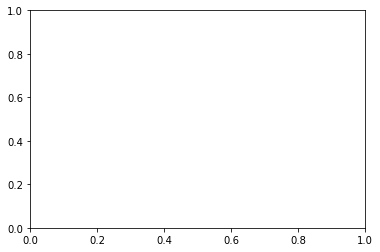

In [47]:
lasso = Lasso(alpha = 0.4, normalize = True)
# fit to data
lasso.fit(x, y)
# calculate and print the coefficients
lasso_coef = lasso.fit(x, y).coef_
print(lasso_coef)
# show a plot of coefficients
plt.plot(range(len(df.columns)), lasso_coef)
plt.xticks(range(len(df.columns)), df.columns.values)
plt.show()

TypeError: '(slice(None, None, None), slice(None, -1, None))' is an invalid key

[ 0. -0. -0.  0.  0.  0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0.
  0.]


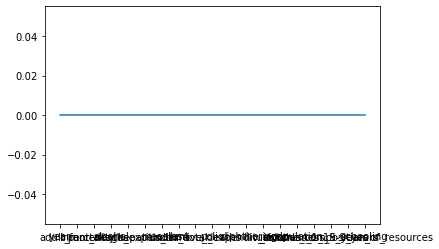

In [72]:
lasso = Lasso(alpha = 0.4, normalize = True)
# fit to data
lasso.fit(x, y)
# calculate and print the coefficients
lasso_coef = lasso.fit(x, y).coef_
print(lasso_coef)
# show a plot of coefficients
plt.plot(range(len(df_columns)), lasso_coef)
plt.xticks(range(len(df_columns)), df_columns.values)
plt.show()

In [40]:
X_train, X_test, y_train, y_test=train_test_split(x, y, test_size=.20)

In [ ]:
lasso = Lasso(alpha = 0.4, normalize = True)
# fit to data
lasso.fit(X, y)
# calculate and print the coefficients
lasso_coef = lasso.fit(X, y).coef_
print(lasso_coef)
# show a plot of coefficients
plt.plot(range(len(df_columns)), lasso_coef)
plt.xticks(range(len(df_columns)), df_columns.values)
plt.show()

In [41]:
model=LinearRegression()    # model
model.fit(X_train.to_numpy(), y_train)   # model train

LinearRegression()

In [42]:
y_pred=model.predict(X_test.to_numpy())   # model prediction


y_pred_train=model.predict(X_train.to_numpy())

Text(0.5, 1.0, 'Train Residual histogram')

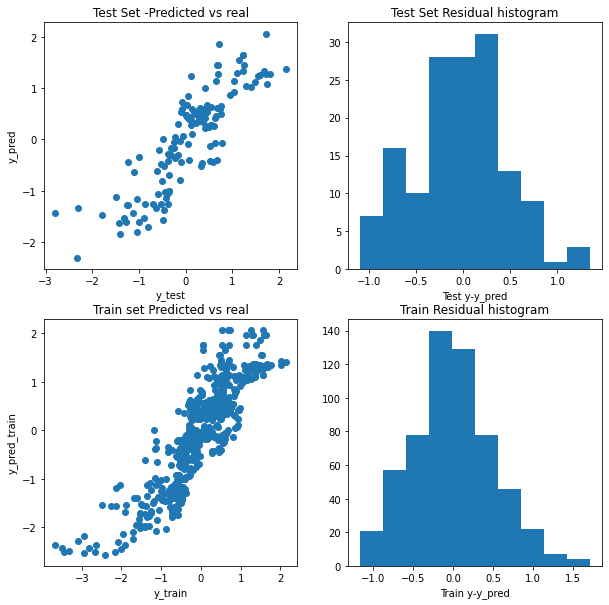

In [43]:
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(2,2,figsize=(10,10))
ax[0,0].plot(y_pred, y_test, 'o')
ax[0,0].set_xlabel("y_test")
ax[0,0].set_ylabel("y_pred")
ax[0,0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[0,1].hist(y_test - y_pred)
ax[0,1].set_xlabel("Test y-y_pred")
ax[0,1].set_title("Test Set Residual histogram")

ax[1,0].plot(y_pred_train, y_train, 'o')
ax[1,0].set_xlabel("y_train")
ax[1,0].set_ylabel("y_pred_train")
ax[1,0].set_title("Train set Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1,1].hist(y_train - y_pred_train)
ax[1,1].set_xlabel("Train y-y_pred")
ax[1,1].set_title("Train Residual histogram")

In [44]:
train_mse=mse(y_train,model.predict(X_train.to_numpy()))
test_mse=mse(y_test,model.predict(X_test.to_numpy()))

print ('train MSE: {} -- test MSE: {}'.format(train_mse, test_mse))

train MSE: 0.25653047311476496 -- test MSE: 0.23672857857877316


In [45]:
print ('train RMSE: {} -- test RMSE: {}'.format(train_mse**.5, test_mse**.5))

train RMSE: 0.5064883741160946 -- test RMSE: 0.48654761183133266


In [46]:
train_mae=mae(y_train,model.predict(X_train.to_numpy()))
test_mae=mae(y_test,model.predict(X_test.to_numpy()))

print ('train MAE: {} -- test MAE: {}'.format(train_mse, test_mse))

train MAE: 0.25653047311476496 -- test MAE: 0.23672857857877316


In [47]:
r2= model.score(X_test.to_numpy(), y_test)
print (r2)

print(r2_score(y_test,model.predict(X_test.to_numpy())))

0.7297838126085052
0.7297838126085052


In [48]:
N=X_train.shape[0]
p=36
x = (1-r2)
y = (N-1) / (N-p-1)
adj_rsquared = (1 - (x * y))
print("Adjusted-R2 : " , adj_rsquared)

Adjusted-R2 :  0.7119346699551221


In [49]:
X_train_const = sm.add_constant(X_train) # adding a constant

model = sm.OLS(y_train, X_train_const).fit()
predictions_train = model.predict(X_train_const) 

X_test_const = sm.add_constant(X_test) # adding a constant
predictions_test = model.predict(X_test_const) 
print_model = model.summary()
print(print_model)



                            OLS Regression Results                            
Dep. Variable:        life_expectancy   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     156.2
Date:                Mon, 15 Nov 2021   Prob (F-statistic):          5.36e-164
Time:                        17:55:12   Log-Likelihood:                -429.91
No. Observations:                 582   AIC:                             883.8
Df Residuals:                     570   BIC:                             936.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0066 